In [2]:
pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\dakar\Desktop\NFL\NFL.csv', low_memory=False)

In [3]:
#filter rows
nedf = df[(df.down.isin([1.0, 2.0, 3.0, 4.0])) & ((df.play_type=='run') | (df.play_type == 'pass'))]

In [4]:
#filter columns
nedf = nedf[['game_seconds_remaining', 'yardline_100', 'down', 'ydstogo', 'play_type', 'pass_length', 'pass_location', 'run_location']]

In [5]:
nedf

,game_seconds_remaining,yardline_100,down,ydstogo,play_type,pass_length,pass_location,run_location
1,3593.0,58.0,1.0,10,pass,short,left,NaN
2,3556.0,53.0,2.0,5,run,NaN,NaN,right
3,3515.0,56.0,3.0,8,pass,deep,right,NaN
5,3496.0,98.0,1.0,10,run,NaN,NaN,middle
6,3460.0,98.0,2.0,10,pass,short,left,NaN
...,...,...,...,...,...,...,...,...
449363,82.0,71.0,2.0,1,pass,short,right,NaN
449364,77.0,71.0,3.0,1,pass,short,middle,NaN
449366,63.0,66.0,2.0,10,pass,short,middle,NaN
449367,58.0,66.0,3.0,10,pass,short,middle,NaN


In [6]:
import numpy as np
def get_full_play_type(play):
    play_type, pass_location, run_location = play
    if(play_type == 'run'):
        return play_type+'_'+ run_location
    else:
        return play_type+'_'+ pass_location
nedf = nedf.replace(np.nan, 'unknown', regex=True)    
nedf['full_play_type'] = nedf[['play_type','pass_location', 'run_location']].apply(get_full_play_type, axis=1)
nedf = nedf[(nedf.full_play_type.isin(['pass_left', 'pass_middle','pass_right','run_left', 'run_middle', 'run_right']))]

In [7]:
nedf.groupby(['full_play_type']).count()[['play_type']]

,play_type
full_play_type,
pass_left,62909
pass_middle,40840
pass_right,70110
run_left,47691
run_middle,36386
run_right,47230


<AxesSubplot:ylabel='full_play_type'>

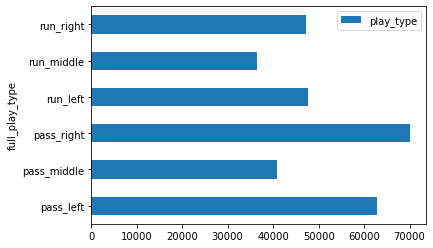

In [8]:
nedf.groupby(['full_play_type']).count()[['play_type']].plot(kind='barh')

In [9]:
nedf.groupby(['full_play_type']).count()[['play_type']].apply(lambda x:100 * x / float(x.sum()))

,play_type
full_play_type,
pass_left,20.614682
pass_middle,13.382880
pass_right,22.974381
run_left,15.627888
run_middle,11.923347
run_right,15.476822


In [10]:
le = preprocessing.LabelEncoder()
le.fit(nedf.full_play_type)
nedf['full_play_type_code'] = le.transform(nedf['full_play_type'])

<AxesSubplot:ylabel='full_play_type_code'>

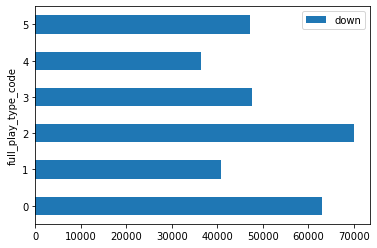

In [11]:
nedf.groupby(['full_play_type_code']).count()[['down']].plot(kind='barh')

In [12]:
nedf = pd.concat([nedf, pd.get_dummies(nedf['down'], prefix='down')], axis=1)

In [13]:
nedf.describe()

,yardline_100,down,ydstogo,full_play_type_code,down_1.0,down_2.0,down_3.0,down_4.0
count,305166.000000,305166.000000,305166.000000,305166.000000,305166.000000,305166.000000,305166.000000,305166.000000
mean,52.453157,1.783072,8.621413,2.312928,0.448081,0.335280,0.202126,0.014513
std,24.642130,0.813145,3.930680,1.699008,0.497298,0.472089,0.401586,0.119594
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,2.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,2.000000,10.000000,4.000000,1.000000,1.000000,0.000000,0.000000
max,99.000000,4.000000,50.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
nedf['yardline_100']/=100

In [15]:
nedf['ydstogo']/=100

In [16]:
nedf.describe()

,yardline_100,down,ydstogo,full_play_type_code,down_1.0,down_2.0,down_3.0,down_4.0
count,305166.000000,305166.000000,305166.000000,305166.000000,305166.000000,305166.000000,305166.000000,305166.000000
mean,0.524532,1.783072,0.086214,2.312928,0.448081,0.335280,0.202126,0.014513
std,0.246421,0.813145,0.039307,1.699008,0.497298,0.472089,0.401586,0.119594
min,0.010000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,1.000000,0.060000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.560000,2.000000,0.100000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,0.730000,2.000000,0.100000,4.000000,1.000000,1.000000,0.000000,0.000000
max,0.990000,4.000000,0.500000,5.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#select important columns for input
X=nedf[['yardline_100', 'down', 'ydstogo', 'down_1.0', 'down_2.0', 'down_3.0', 'down_4.0']]
#select result column for output
Y=nedf['full_play_type_code']
#split data for train and test
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 0)

In [22]:
from sklearn.tree import DecisionTreeClassifier
the_clf=DecisionTreeClassifier(max_depth=8)
the_clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=8)

In [23]:
from sklearn.metrics import accuracy_score
pred = the_clf.predict(test_x)
acc =accuracy_score(test_y, pred)
print(acc)

0.24369527604467048
